Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.datasets import load_files 
from keras.utils import np_utils  
from collections import Counter
import random
from tensorflow.keras import layers, regularizers
from PIL import Image

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Test')
data_sample_image=pathlib.Path('gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000279.jpg' )

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train
                                                             ,seed=123,
                                                             subset='training',
                                                             batch_size=batch_size
                                                             ,image_size=(img_height, img_width),validation_split=0.2 )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train
                                                             ,seed=123,
                                                             subset='validation',
                                                             batch_size=batch_size
                                                             ,image_size=(img_height, img_width),validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt
import os
num_classes=9
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


for i in class_names:
  folder_path=os.path.join(data_dir_train, i)
  image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
  image_file = random.choice(image_files)
  img = Image.open(os.path.join(folder_path, image_file))
  print(folder_path)
  img.show()

### your code goes here, you can use training or validation data to visualize

Output hidden; open in https://colab.research.google.com to view.

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  

  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  


  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  
  layers.Flatten(),
  layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 668s 2s/step - loss: 12.7383 - accuracy: 0.3845 - val_loss: 13.7500 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 6s 113ms/step - loss: 11.0317 - accuracy: 0.5681 - val_loss: 14.7243 - val_accuracy: 0.1633
Epoch 3/20
56/56 [==============================] - 6s 115ms/step - loss: 10.4678 - accuracy: 0.6987 - val_loss: 14.1906 - val_accuracy: 0.1834
Epoch 4/20
56/56 [==============================] - 7s 119ms/step - loss: 9.9411 - accuracy: 0.8270 - val_loss: 14.0727 - val_accuracy: 0.1387
Epoch 5/20
56/56 [==============================] - 6s 116ms/step - loss: 9.5071 - accuracy: 0.9157 - val_loss: 12.5518 - val_accuracy: 0.2081
Epoch 6/20
56/56 [==============================] - 7s 120ms/step - loss: 9.2067 - accuracy: 0.9475 - val_loss: 12.7371 - val_accuracy: 0.2662
Epoch 7/20
56/56 [==============================] - 7s 116ms/step - loss: 8.9613 - accuracy: 0.9604 - val_loss: 11.4160 - val_accuracy: 0.35

### Visualizing training results

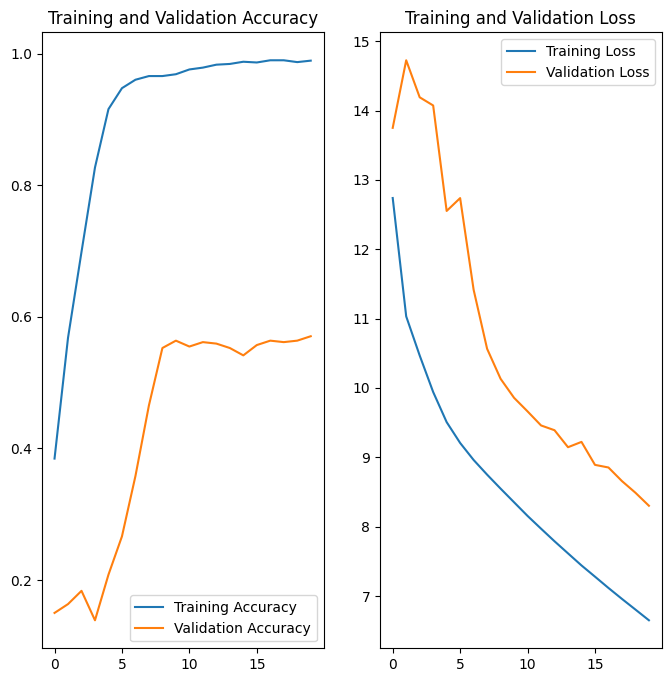

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Training accuracy is good and validation accuracy is poor which clearly indicates there was overfitting by the model**

**We could look at augmentation strategy to improve the model accuracy**

**We could also try at adding drop outs to see if it improves anything**


### Write your findings here

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


14/14 [==============================] - 0s 32ms/step - loss: 8.3012 - accuracy: 0.5705
Accuracy:  0.93359375
Validation Accuracy:  0.5704697966575623
Loss:  6.733994483947754
Validation Loss 8.301234245300293


### Todo:
### Create the model, compile and train the model using data augmentation strategy


In [ ]:
data_augumentation = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

model = Sequential([
  data_augumentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),

  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),


  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_7 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                      

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 176ms/step - loss: 16.1006 - accuracy: 0.2645 - val_loss: 13.0581 - val_accuracy: 0.2103
Epoch 2/20
56/56 [==============================] - 10s 173ms/step - loss: 11.6803 - accuracy: 0.4001 - val_loss: 14.9142 - val_accuracy: 0.2170
Epoch 3/20
56/56 [==============================] - 10s 174ms/step - loss: 11.2900 - accuracy: 0.4448 - val_loss: 14.3793 - val_accuracy: 0.2394
Epoch 4/20
56/56 [==============================] - 10s 174ms/step - loss: 11.0250 - accuracy: 0.4682 - val_loss: 14.5998 - val_accuracy: 0.2528
Epoch 5/20
56/56 [==============================] - 10s 174ms/step - loss: 10.8194 - accuracy: 0.4548 - val_loss: 14.7569 - val_accuracy: 0.2304
Epoch 6/20
56/56 [==============================] - 10s 173ms/step - loss: 10.5888 - accuracy: 0.4978 - val_loss: 12.1561 - val_accuracy: 0.3714
Epoch 7/20
56/56 [==============================] - 10s 172ms/step - loss: 10.3682 - accuracy: 0.4950 - val_loss: 12.2587 - val_ac

### Visualizing the results

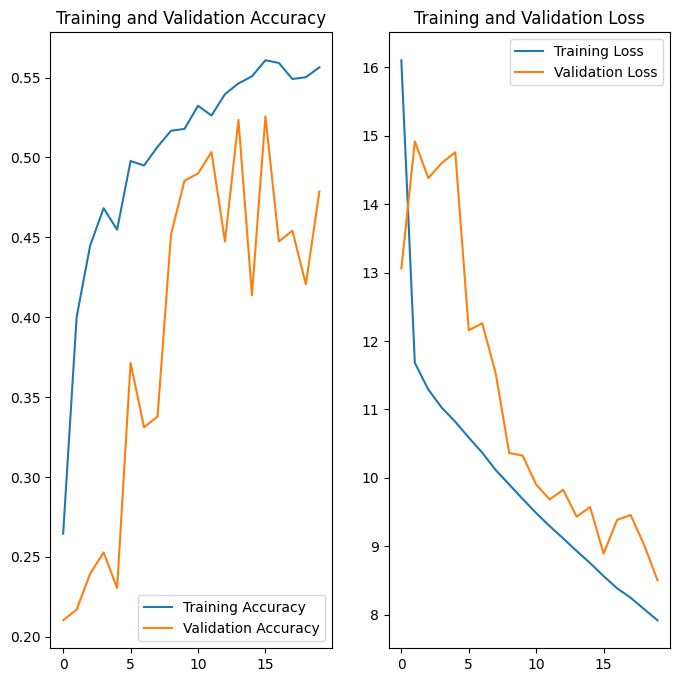

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Model is underfitting clearly showing poor accuracy**

**As shown by the calculations below, there is class imbalance which should be handled**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
import matplotlib.pyplot as plt
import os
num_classes=9
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")
for i in class_names:
  count=0
  folder_path=os.path.join(data_dir_train, i)
  
  for file_name in os.listdir(folder_path):
    if file_name.endswith(image_extensions):
      count += 1
  print(i+'='+str(count))   

actinic keratosis=114
basal cell carcinoma=376
dermatofibroma=95
melanoma=438
nevus=357
pigmented benign keratosis=462
seborrheic keratosis=77
squamous cell carcinoma=181
vascular lesion=139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


**seborrheic keratosis has the least amount of samples**

**pigmented benign keratosis dominates with most number of samples**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D085EBD00>: 100%|██████████| 500/500 [00:24<00:00, 20.12 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4D0862F0D0>: 100%|██████████| 500/500 [00:25<00:00, 19.84 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D08667490>: 100%|██████████| 500/500 [00:22<00:00, 22.38 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4D085E8400>: 100%|██████████| 500/500 [01:43<00:00,  4.85 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F4D08667460>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D086BE440>: 100%|██████████| 500/500 [00:22<00:00, 22.71 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4D086E2D70>: 100%|██████████| 500/500 [00:47<00:00, 10.64 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4D922F5DB0>: 100%|██████████| 500/500 [00:21<00:00, 23.28 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D0849B760>: 100%|██████████| 500/500 [00:20<00:00, 24.05 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import matplotlib.pyplot as plt
import os
num_classes=9
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")
for i in class_names:
  count=0
  folder_path=os.path.join(data_dir_train, i)
  output_folder_path=os.path.join(folder_path, 'output')
  for file_name in os.listdir(output_folder_path):
    if file_name.endswith(image_extensions):
      count += 1
  print(i+'='+str(count))   

actinic keratosis=500
basal cell carcinoma=500
dermatofibroma=500
melanoma=500
nevus=500
pigmented benign keratosis=500
seborrheic keratosis=500
squamous cell carcinoma=500
vascular lesion=500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=pathlib.Path("gdrive/My Drive/AI-ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,''
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,''
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),

  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),


  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes, activation='softmax')
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 44s 244ms/step - loss: 12.4512 - accuracy: 0.4043 - val_loss: 17.8859 - val_accuracy: 0.1396
Epoch 2/50
169/169 [==============================] - 40s 233ms/step - loss: 10.4476 - accuracy: 0.5829 - val_loss: 13.1770 - val_accuracy: 0.3036
Epoch 3/50
169/169 [==============================] - 41s 234ms/step - loss: 9.6050 - accuracy: 0.6751 - val_loss: 10.6915 - val_accuracy: 0.3794
Epoch 4/50
169/169 [==============================] - 41s 235ms/step - loss: 8.9008 - accuracy: 0.7296 - val_loss: 8.9103 - val_accuracy: 0.6719
Epoch 5/50
169/169 [==============================] - 42s 241ms/step - loss: 8.2289 - accuracy: 0.7954 - val_loss: 8.2057 - val_accuracy: 0.7223
Epoch 6/50
169/169 [==============================] - 40s 233ms/step - loss: 7.7007 - accuracy: 0.8179 - val_loss: 7.7733 - val_accuracy: 0.7365
Epoch 7/50
169/169 [==============================] - 41s 234ms/step - loss: 7.1622 - accuracy: 0.8507 - val_loss: 12.6533 - 

#### **Todo:**  Visualize the model results

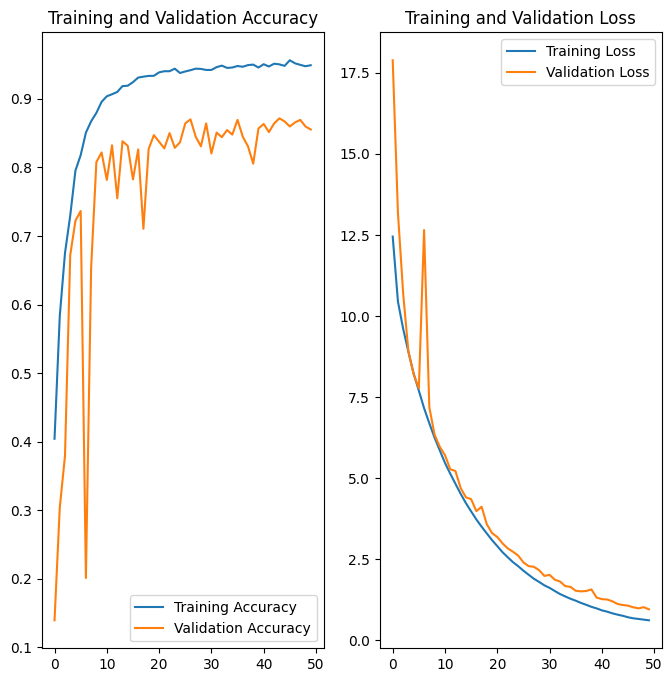

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Class Rebalance with augmentation strategy helped the overall validation accuracy**

Final Score


Epoch 50/50
169/169 [==============================] - 40s 234ms/step - loss: 0.6234 - **accuracy: 0.9490 **- val_loss: 0.9611 - **val_accuracy: 0.8552**


Overfitting and Underfitting are addressed Here clearly
